In [1]:
import json
import os
import math
import librosa

In [3]:
with open('data_finaloriginal.json', "r") as f:
    data1 = json.load(f)
    
x1 = data1['mfcc']
y1 = data1['labels']

In [4]:
with open('data_final.json', "r") as f:
    data2 = json.load(f)
    
x2 = data2['mfcc']
y2 = data2['labels']

In [5]:
with open('data_finalpitchlowered.json', "r") as f:
    data3 = json.load(f)
    
x3 = data3['mfcc']
y3 = data3['labels']

In [6]:
with open('data_finalrateboosted.json', "r") as f:
    data4 = json.load(f)
    
x4 = data4['mfcc']
y4 = data4['labels']

In [8]:
with open('data_finalratelowerd.json', "r") as f:
    data5 = json.load(f)
    
x5 = data5['mfcc']
y5 = data5['labels']

In [10]:
type(x1)

list

In [12]:
import numpy as np

Xargs = (np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(x5))
yargs = (np.array(y1), np.array(y2), np.array(y3), np.array(y4), np.array(y5))

In [13]:
X = np.concatenate(Xargs)
y = np.concatenate(yargs)

In [14]:
import gc

del data1
del x1
del y1
del data2
del x2
del y2
del data3
del x3
del y3
del data4
del x4
del y4
del data5
del x5
del y5
del Xargs
del yargs

gc.collect()

8

In [15]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import random
import librosa
import math

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]
input_shape = (X_train.shape[1], X_train.shape[2], 1)


In [17]:
model_cnn = keras.Sequential()

model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

model_cnn.add(keras.layers.Dense(10, activation='softmax'))

optimiser = keras.optimizers.Adam(learning_rate=0.0001)


In [18]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                        

In [19]:
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=75)


test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/75
918/918 [==============================] - 25s 26ms/step - loss: 1.9127 - accuracy: 0.3418 - val_loss: 1.4265 - val_accuracy: 0.4938
Epoch 2/75
918/918 [==============================] - 28s 30ms/step - loss: 1.5021 - accuracy: 0.4652 - val_loss: 1.2406 - val_accuracy: 0.5584
Epoch 3/75
918/918 [==============================] - 28s 30ms/step - loss: 1.3603 - accuracy: 0.5215 - val_loss: 1.1462 - val_accuracy: 0.5988
Epoch 4/75
918/918 [==============================] - 28s 30ms/step - loss: 1.2618 - accuracy: 0.5564 - val_loss: 1.0539 - val_accuracy: 0.6307
Epoch 5/75
918/918 [==============================] - 28s 31ms/step - loss: 1.1769 - accuracy: 0.5866 - val_loss: 1.0056 - val_accuracy: 0.6502
Epoch 6/75
918/918 [==============================] - 28s 30ms/step - loss: 1.1156 - accuracy: 0.6110 - val_loss: 0.9639 - val_accuracy: 0.6691
Epoch 7/75
918/918 [==============================] - 28s 31ms/step - loss: 1.0686 - accuracy: 0.6299 - val_loss: 0.9789 - val_accuracy:

NameError: name 'plot_history' is not defined

In [20]:
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

383/383 - 2s - loss: 0.5324 - accuracy: 0.8156 - 2s/epoch - 6ms/step

Test accuracy: 0.815610945224762


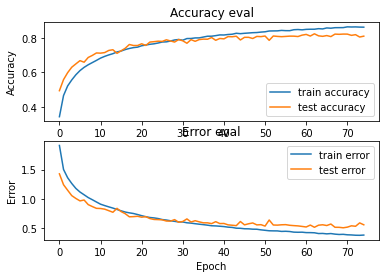

In [21]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
    
plot_history(history)

In [22]:

for n in range(10):

  i = random.randint(0,len(X_test))
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))

def process_input(audio_file, track_duration):
  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):
    start = samples_per_segment * d
    finish = start + samples_per_segment

    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

genre_dict = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}



Real Genre: 2
Predicted Genre: 9

Real Genre: 7
Predicted Genre: 7

Real Genre: 7
Predicted Genre: 7

Real Genre: 2
Predicted Genre: 2

Real Genre: 7
Predicted Genre: 7

Real Genre: 4
Predicted Genre: 8

Real Genre: 5
Predicted Genre: 5

Real Genre: 1
Predicted Genre: 1

Real Genre: 9
Predicted Genre: 9

Real Genre: 7
Predicted Genre: 7
